In [22]:
import numpy as np
from scipy.signal import stft
from scipy import signal
import matplotlib.pyplot as plt
from scipy.stats import mode

In [4]:
data = np.load('datasets/OpenBCI_GUI-v5-meditation.npy')

# quantidade de linhas do arquivo 
print(data.shape[0])
 
# quantidade de linhas / 8
data.shape[0] / 8

data = data.swapaxes(1,0)

# dominio do tempo
data.shape

175952


(8, 175952)

In [5]:
_,_,freqs = stft(data, fs=250., nperseg=256)

freqs = freqs.reshape(8, 129 * 1376)

# domínio da frequência
freqs.shape

print(freqs)

[[ 2.32150440e+04+0.j  4.60623401e+04+0.j  4.60604250e+04+0.j ...
  -1.07872893e-01+0.j -5.21751903e+01+0.j -1.13886147e+02+0.j]
 [ 1.89381519e+04+0.j  3.75836948e+04+0.j  3.76018809e+04+0.j ...
  -9.90810871e-02+0.j -4.51948293e+01+0.j -9.87852730e+01+0.j]
 [-1.12477115e+04+0.j -2.23333484e+04+0.j -2.23408791e+04+0.j ...
   1.08896906e-01+0.j  2.39524073e+01+0.j  5.12280290e+01+0.j]
 ...
 [-1.24845040e+04+0.j -2.47816928e+04+0.j -2.47856852e+04+0.j ...
   4.22643788e-01+0.j  2.71175457e+01+0.j  5.90395241e+01+0.j]
 [-5.04606699e+03+0.j -1.00179799e+04+0.j -1.00297532e+04+0.j ...
   2.00696914e-01+0.j  4.74377374e+00+0.j  9.95133913e+00+0.j]
 [-1.86583324e+03+0.j -3.69961011e+03+0.j -3.70972527e+03+0.j ...
   1.64868003e-01+0.j -4.70153272e-01+0.j -1.22419213e+00+0.j]]


**Plot no domínio do tempo**

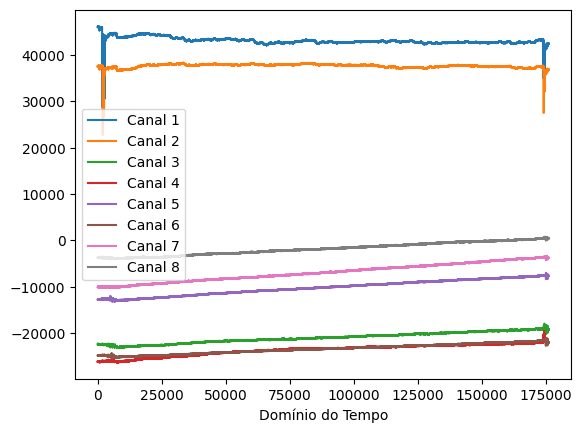

In [18]:
# iterar em todos os canais
for i in range(8):
    plt.plot(data[i, :], color=plt.cm.tab10(i), label='Canal {}'.format(i+1))
    
plt.xlabel('Domínio do Tempo')
plt.legend()
plt.show()

**Plot no domínio da frequência**

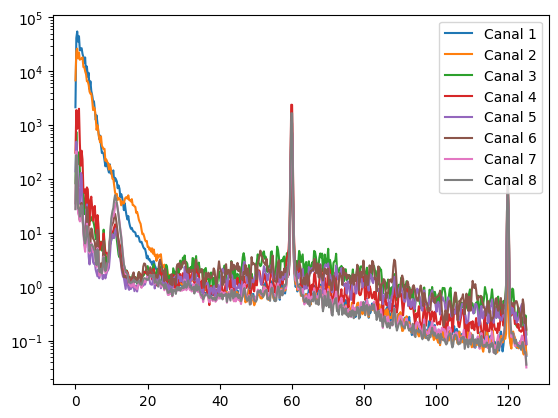

In [19]:
f, psd = signal.welch(data, fs=250, nperseg=1024, axis=1)

plt.semilogy(f, psd.T)
plt.legend(['Canal 1', 'Canal 2', 'Canal 3', 'Canal 4', 'Canal 5', 'Canal 6', 'Canal 7', 'Canal 8'])
plt.show()

**Plot sobre a média no domínio do tempo**

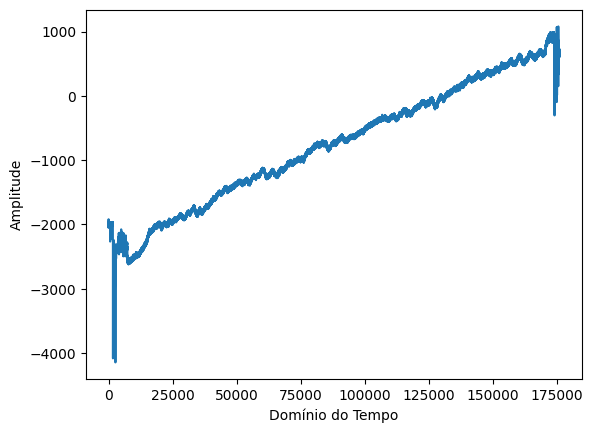

In [20]:
# Calcula as médias das linhas de data
media = np.mean(data, axis=0)

plt.plot(media)
plt.xlabel('Domínio do Tempo')
plt.ylabel('Amplitude')
plt.show()

**Plot sobre a mediana no domínio do tempo**

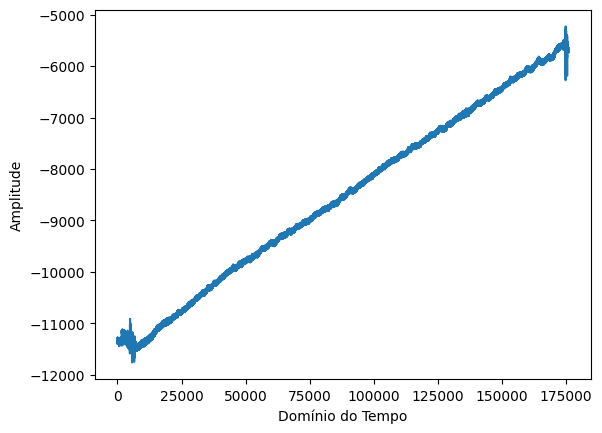

In [30]:
# Calcula as médias das linhas de data
mediana = np.median(data, axis=0)

plt.plot(mediana)
plt.xlabel('Domínio do Tempo')
plt.ylabel('Amplitude')
plt.show()

**Plot sobre a moda no domínio do tempo**

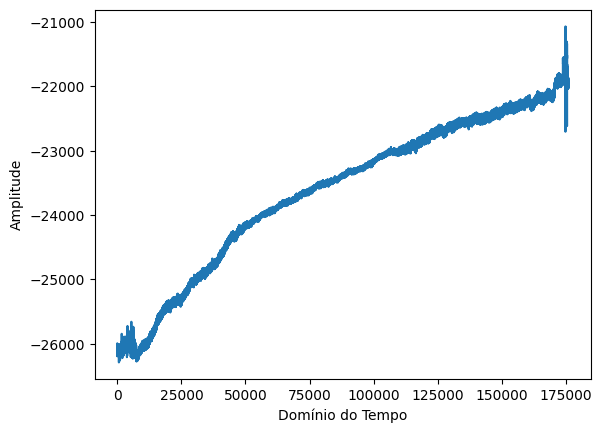

In [29]:
moda = mode(data, axis=0, keepdims=True)[0].flatten()

plt.plot(moda)
plt.xlabel('Domínio do Tempo')
plt.ylabel('Amplitude')
plt.show()

**Plot sobre a média no domínio da frequência**

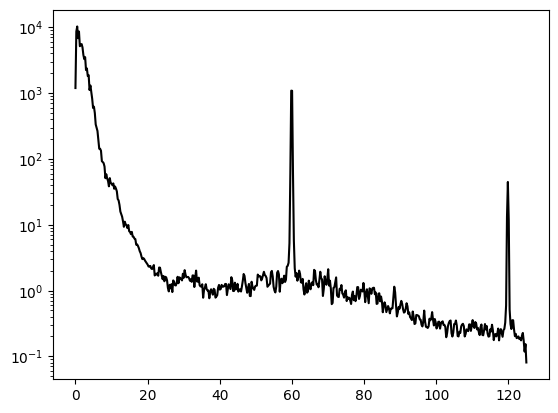

In [33]:
mean_psd = np.mean(psd, axis=0)

plt.semilogy(f, mean_psd, 'k')
plt.show()

**Plot sobre a mediana no domínio da frequência**

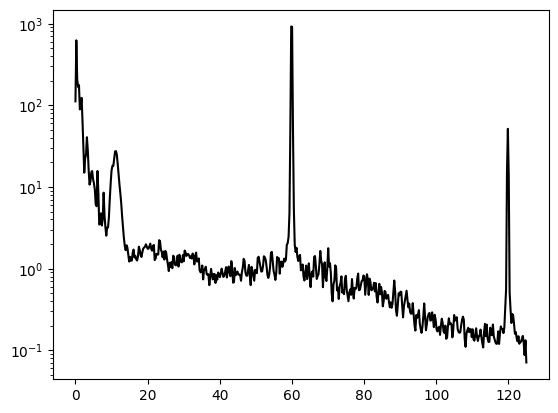

In [35]:
median_psd = np.median(psd, axis=0)

plt.semilogy(f, median_psd, 'k')
plt.show()

**Plot sobre a moda no domínio da frequência**

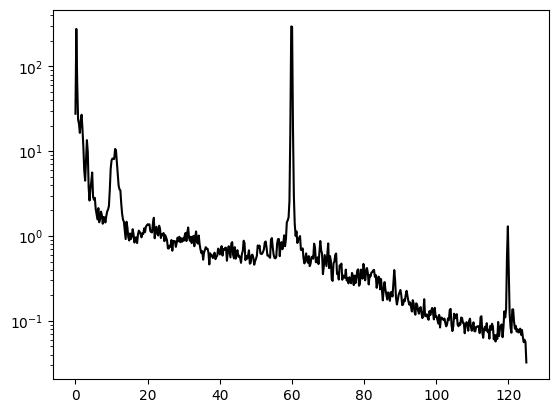

In [36]:
f, psd = signal.welch(data, fs=250, nperseg=1024, axis=1)

mode_psd = mode(psd, axis=0, keepdims=True)[0].flatten()

plt.semilogy(f, mode_psd, 'k')
plt.show()